* https://www.youtube.com/watch?v=0B5eIE_1vpU

In [17]:
from sklearn.datasets import load_boston

print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [1]:
X, y = load_boston(return_X_y=True)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

mod1 = LinearRegression().fit(X, y)
mod2 = KNeighborsRegressor().fit(X, y)
p1 = mod1.predict(X)
p2 = mod1.predict(X)

Text(0, 0.5, 'y')

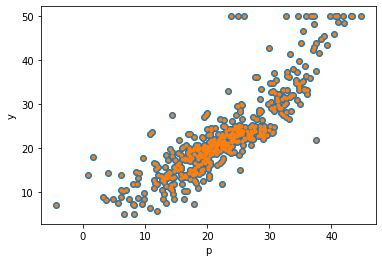

In [9]:
import matplotlib.pyplot as pl

pl.plot(p1, y, 'o', label='mod1')
pl.plot(p2, y, '.', label='mod2')
pl.xlabel('p')
pl.ylabel('y')

## pipeline

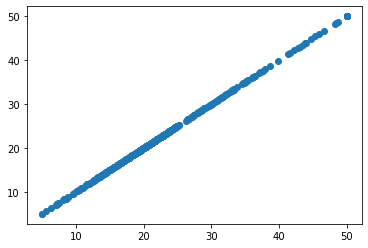

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
p = pipe.fit(X, y).predict(X)
pl.scatter(p, y)

In [12]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [13]:
from sklearn.model_selection import GridSearchCV

mod = GridSearchCV(estimator=pipe,
                   param_grid={
                       'model__n_neighbors': [1,2,3,4,5]
                       
                   },
                   cv=3
)
mod.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5]})

In [15]:
import pandas as pd

df=pd.DataFrame(mod.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001022,0.000101,0.001343,0.000108,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,5
1,0.000840,0.000038,0.001354,0.000162,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,4
2,0.000856,0.000042,0.001384,0.000035,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.000797,0.000008,0.001366,0.000094,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,2
4,0.000838,0.000009,0.001420,0.000076,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,3


## preprocessing: transform

(100, 1)

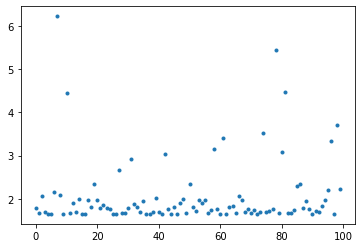

In [43]:
import numpy as np

X = np.random.rand(100)
X = np.c_[X**2 + np.sqrt(1/X)]  #np.atleast_2d(X).T
pl.plot(X, '.')
X.shape

/home/jerome/miniconda3/envs/py3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


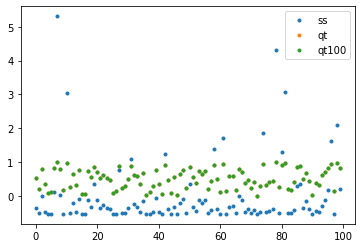

In [46]:
from sklearn.preprocessing import QuantileTransformer

X1 = StandardScaler().fit_transform(X)
X2 = QuantileTransformer().fit_transform(X)
X3 = QuantileTransformer(n_quantiles=100).fit_transform(X)

pl.plot(X1, '.', label='ss')
pl.plot(X2, '.', label='qt')
pl.plot(X3, '.', label='qt100')
pl.legend()

## data
* https://drawdata.xyz/

In [48]:
d = pd.read_clipboard(sep=",")
d

,x,y,z
0,106.782446,435.008385,a
1,110.144904,405.057295,a
2,143.645950,427.624434,a
3,88.081516,353.193919,a
4,72.181487,396.674808,a
...,...,...,...
209,568.258373,423.970616,c
210,576.481802,415.568043,c
211,512.613138,462.397560,c
212,540.089139,412.470701,c


## metric
* data: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pl

data = pd.read_csv("../data/creditcard.csv.zip", compression="zip")

In [2]:
data.shape

(284807, 31)

In [3]:
X = data.drop(columns=["Time","Amount","Class"]).values
y = data["Class"].values
y.sum()

492

There is only 492 fraud cases out of total 284k cases! Dataset is imbalanced.

In [4]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression()
yhat = mod.fit(X, y).predict(X)
yhat.sum()

348

Predicted fraud cases are much less than the actual. So introduce weighting.

In [5]:
#class 0=no fraud: assign weight of 1; and class 1=fraud assign weight of 2
mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
yhat = mod.fit(X, y).predict(X)
yhat.sum()

437

Prediction improved!

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1,4)]},
    cv=4,
    n_jobs=-1
)
grid.fit(X, y)

In [ ]:
import pandas as pd

pd.DataFrame(grid.cv_results_)

What is the scoring method?

In [20]:
lr = LogisticRegression()
lr.score?

Use different scoring metrics:
* precision_score: given that I predict fraud, how accurate am I?
* recall_score: did I get all the fraud cases?

In [ ]:
from sklearn.metrics import precision_score, recall_score


precision_score(y, grid.predict(X)), recall_score(y, grid.predict(X))

Add precision and recall to grid search

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1,10)]},
    #additional
    scoring={'precision': make_scorer(precision_score),
             'recall': make_scorer(recall_score)
            },
    refit='precision',
    return_train_score=True,
    cv=4,
    n_jobs=-1
)
grid.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

In [8]:
df = pd.DataFrame(grid.cv_results_)
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_class_weight', 'params', 'split0_test_precision',
       'split1_test_precision', 'split2_test_precision',
       'split3_test_precision', 'mean_test_precision', 'std_test_precision',
       'rank_test_precision', 'split0_train_precision',
       'split1_train_precision', 'split2_train_precision',
       'split3_train_precision', 'mean_train_precision', 'std_train_precision',
       'split0_test_recall', 'split1_test_recall', 'split2_test_recall',
       'split3_test_recall', 'mean_test_recall', 'std_test_recall',
       'rank_test_recall', 'split0_train_recall', 'split1_train_recall',
       'split2_train_recall', 'split3_train_recall', 'mean_train_recall',
       'std_train_recall'],
      dtype='object')

Improvements:
* higher `cv`
* finer class weight for class 1: np.linspace(1, 20, 30)

In [9]:
pl.rcParams['font.size'] = 20

def plot_test(df, cols=None):
    pl.figure(figsize=(12, 4))
    if cols is None:
        cols=['mean_train_recall', 'mean_train_precision']
        
    for score in cols:
        pl.plot([_[1] for _ in df['param_class_weight']],
                df[score],
                label=score
               )
    pl.legend()
    pl.xlabel("class weight")
    pl.ylabel("scores")
    
def plot_train(df, cols=None):
    pl.figure(figsize=(12, 4))
    if cols is None:
        cols=['mean_train_recall', 'mean_train_precision']
        
    for score in cols:
        pl.plot([_[1] for _ in df['param_class_weight']],
                df[score.replace('test','train')],
                label=score
               )
    pl.legend()
    pl.xlabel("class weight")
    pl.ylabel("scores")
 

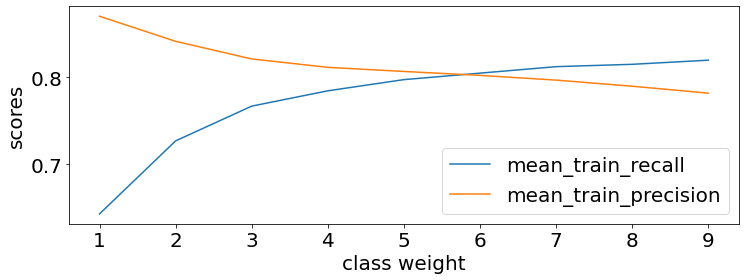

In [10]:
df = pd.DataFrame(grid.cv_results_) 

plot_test(df)   

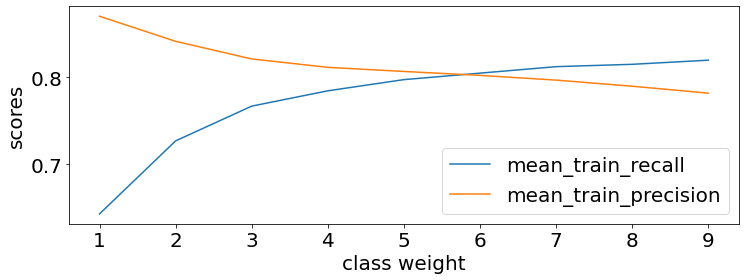

In [11]:
df = pd.DataFrame(grid.cv_results_) 

plot_train(df)

The balance between recall & precision scores are different for train and test 

### custom metric

In [12]:
def min_recall_precision(y_true, y_pred):
    """get minimum of the two"""
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1,10)]},
    scoring={'precision': make_scorer(precision_score),
             'recall': make_scorer(recall_score),
             #additional
             'min_both': make_scorer(min_recall_precision)
            },
    refit='min_both',
    return_train_score=True,
    cv=4,
    n_jobs=-1
)
grid.fit(X, y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]},
             refit='min_both', return_train_score=True,
             scoring={'min_both': make_scorer(min_recall_precision),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

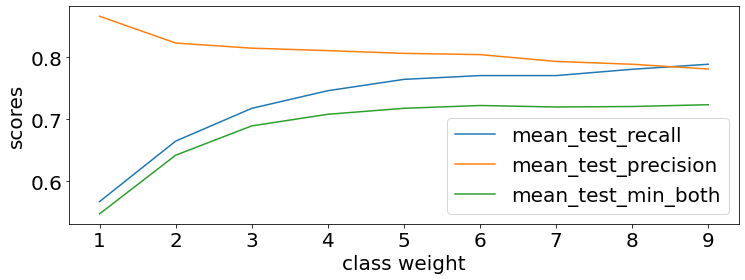

In [14]:
df = pd.DataFrame(grid.cv_results_) 

plot_test(df, cols=['mean_test_recall',
                    'mean_test_precision',
                    'mean_test_min_both'
                   ])

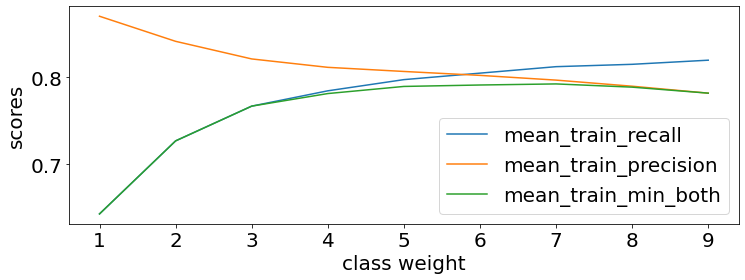

In [15]:
plot_train(df, cols=['mean_train_recall',
                    'mean_train_precision',
                    'mean_train_min_both'
                   ])

### sample weight

add weight on high transaction, log is for numerical stability

In [16]:
grid.fit(X, y, sample_weight=np.log(1 + data['Amount']))

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}, {0: 1, 1: 8},
                                          {0: 1, 1: 9}]},
             refit='min_both', return_train_score=True,
             scoring={'min_both': make_scorer(min_recall_precision),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

### detect outliers

In [17]:
from sklearn.ensemble import IsolationForest

mod = IsolationForest().fit(X)
pred=mod.predict(X)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
from collections import Counter

Counter(pred)

Counter({1: 274437, -1: 10370})

replace 1 for -1 (fraud) and 0 otherwise

In [20]:
np.where(pred==-1, 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import GridSearchCV


def outlier_precision(mod, X, y):
    preds = mod.predict(X)
    return precision_score(y, np.where(preds==-1, 1, 0))

def outlier_recall(mod, X, y):
    preds = mod.predict(X)
    return recall_score(y, np.where(preds==-1, 1, 0))


grid = GridSearchCV(
    estimator=IsolationForest(),
    #hyperparameter to tune
    param_grid={'contamination': np.linspace(0.001, 0.02, 10)},
    scoring={'precision': outlier_precision,
             'recall': outlier_recall},
    refit='precision',
    return_train_score=True,
    cv=5,
    n_jobs=-1
)
grid.fit(X, y)

In [ ]:
df = pd.DataFrame(grid.cv_results_) 

plot_test(df)

In [ ]:
plot_train(df)

## meta estimators